In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv('/content/customer_features.csv')
df.head()

,Customer_Id,recency_days,frequency,monetary,avg_order_value,total_quantity,first_purchase,last_purchase,customer_lifetime,purchase_rate_per_day,...,spend_trend_30d,spend_decline_flag,freq_trend_30d,freq_decline_flag,lifetime_freq_per_day,recent_freq_per_day,freq_trend_long,freq_decline_long_flag,gap_trend,gap_increase_flag
0,10000,24,2,293.0,146.5,2.0,2018-11-13 21:51:53,2018-12-06 19:25:41,22,0.09,...,7.67,0,0.0,0,0.09,0.03,-0.06,1,-0.9,0
1,10002,132,1,149.0,149.0,2.0,2018-08-20 22:26:30,2018-08-20 22:26:30,1,1.00,...,0.00,0,0.0,0,1.00,0.00,-1.00,1,0.0,0
2,10004,144,1,85.0,85.0,4.0,2018-08-08 21:56:53,2018-08-08 21:56:53,1,1.00,...,0.00,0,0.0,0,1.00,0.00,-1.00,1,0.0,0
3,10006,144,2,440.0,220.0,3.0,2018-06-14 00:09:22,2018-08-08 07:25:41,55,0.04,...,0.00,0,0.0,0,0.04,0.00,-0.04,1,-0.3,0
4,10013,227,1,159.0,159.0,1.0,2018-05-17 18:30:32,2018-05-17 18:30:32,1,1.00,...,0.00,0,0.0,0,1.00,0.00,-1.00,1,0.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38997 entries, 0 to 38996
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Id               38997 non-null  int64  
 1   recency_days              38997 non-null  int64  
 2   frequency                 38997 non-null  int64  
 3   monetary                  38997 non-null  float64
 4   avg_order_value           38997 non-null  float64
 5   total_quantity            38997 non-null  float64
 6   first_purchase            38997 non-null  object 
 7   last_purchase             38997 non-null  object 
 8   customer_lifetime         38997 non-null  int64  
 9   purchase_rate_per_day     38997 non-null  float64
 10  mean_interpurchase_days   38997 non-null  float64
 11  std_interpurchase_days    1844 non-null   float64
 12  max_gap                   10166 non-null  float64
 13  pct_orders_with_discount  38997 non-null  float64
 14  prod_d

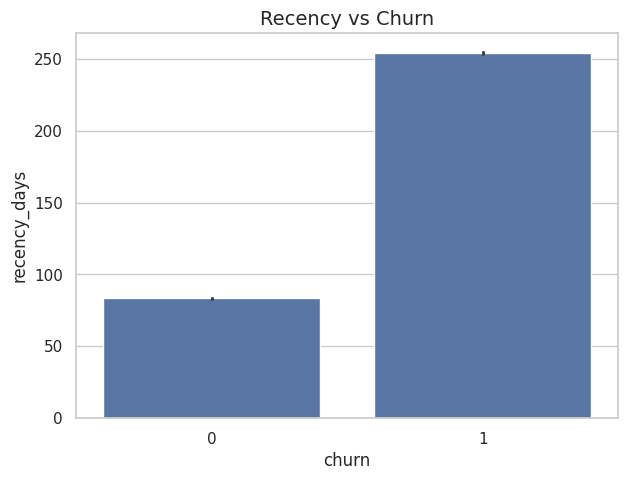

In [4]:

plt.figure(figsize=(7,5))
sns.barplot(x='churn', y='recency_days', data=df)
plt.title("Recency vs Churn", fontsize=14)
plt.show()


**Churned customers have much higher recency, meaning they haven't purchased for many days.**

**Recency is strongly correlated with churn (makes sense behaviorally).**

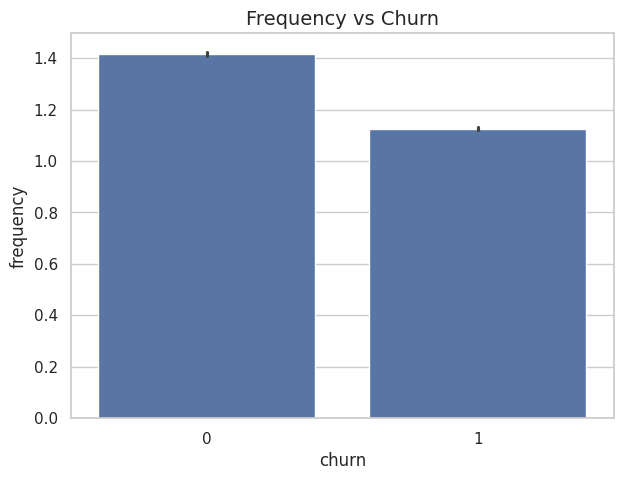

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x='churn', y='frequency', data=df)
plt.title("Frequency vs Churn", fontsize=14)
plt.show()

**Active customers purchase more frequently.**

**Lower frequency strongly signals churn.**

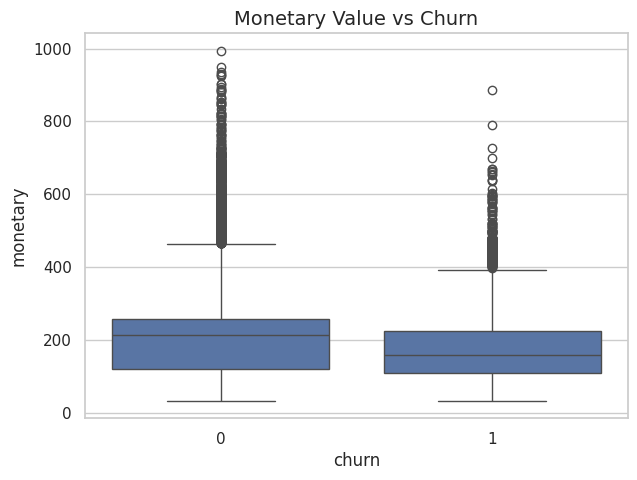

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x='churn', y='monetary', data=df)
plt.title("Monetary Value vs Churn", fontsize=14)
plt.show()

**The monetary distribution is highly right-skewed, showing many high-spending customers (outliers).**

**This is typical in e-commerce, where a small group of customers contributes most of the revenue.**

**Both churned and active customers have high spenders, indicating that even valuable customers are leaving the platform.**

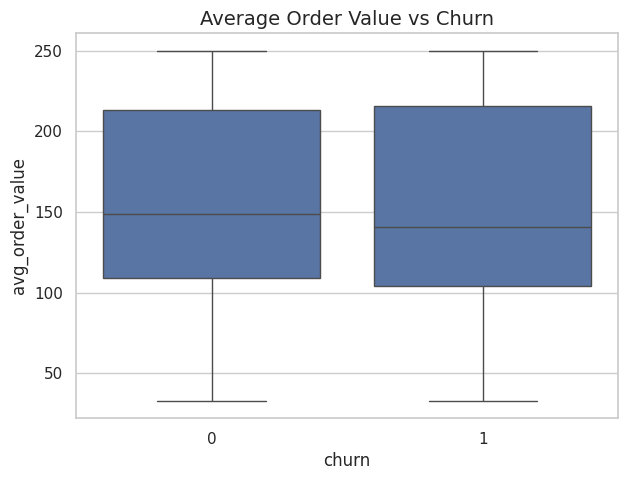

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x='churn', y='avg_order_value', data=df)
plt.title("Average Order Value vs Churn", fontsize=14)
plt.show()

**Customers with higher average order value tend to remain active.**

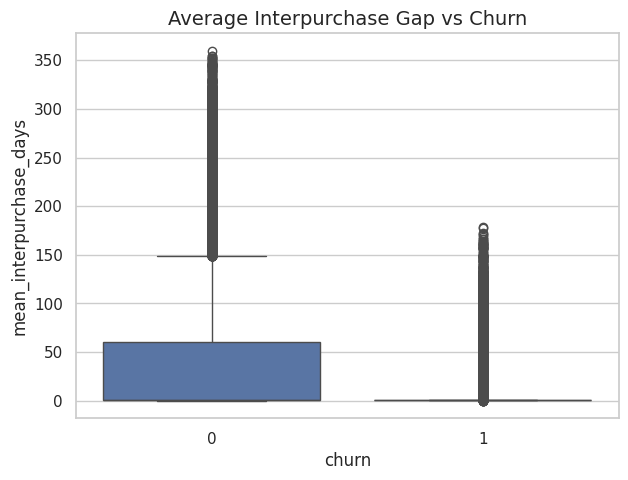

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x='churn', y='mean_interpurchase_days', data=df)
plt.title("Average Interpurchase Gap vs Churn", fontsize=14)
plt.show()


Churners have much longer gaps between their orders.

Interpurchase gap is a powerful behavioral churn signal.



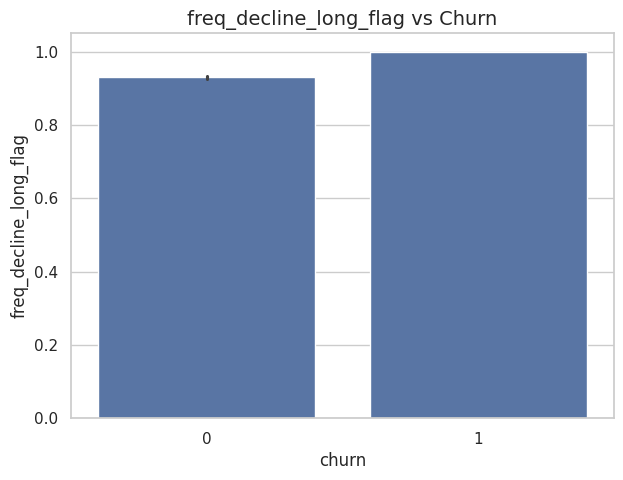

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x='churn', y='freq_decline_long_flag', data=df)
plt.title("freq_decline_long_flag vs Churn", fontsize=14)
plt.show()

**churned customers has more declined in frequency.**

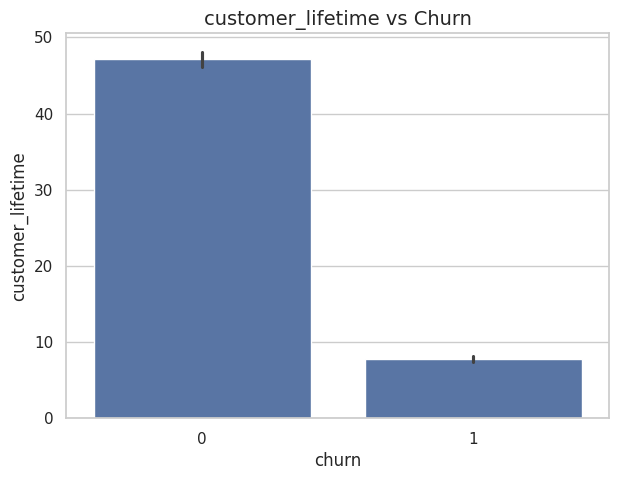

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x='churn', y='customer_lifetime', data=df)
plt.title("customer_lifetime vs Churn", fontsize=14)
plt.show()

**customer lifetime is a strong predictor as loyal customer have less chances to be churned**

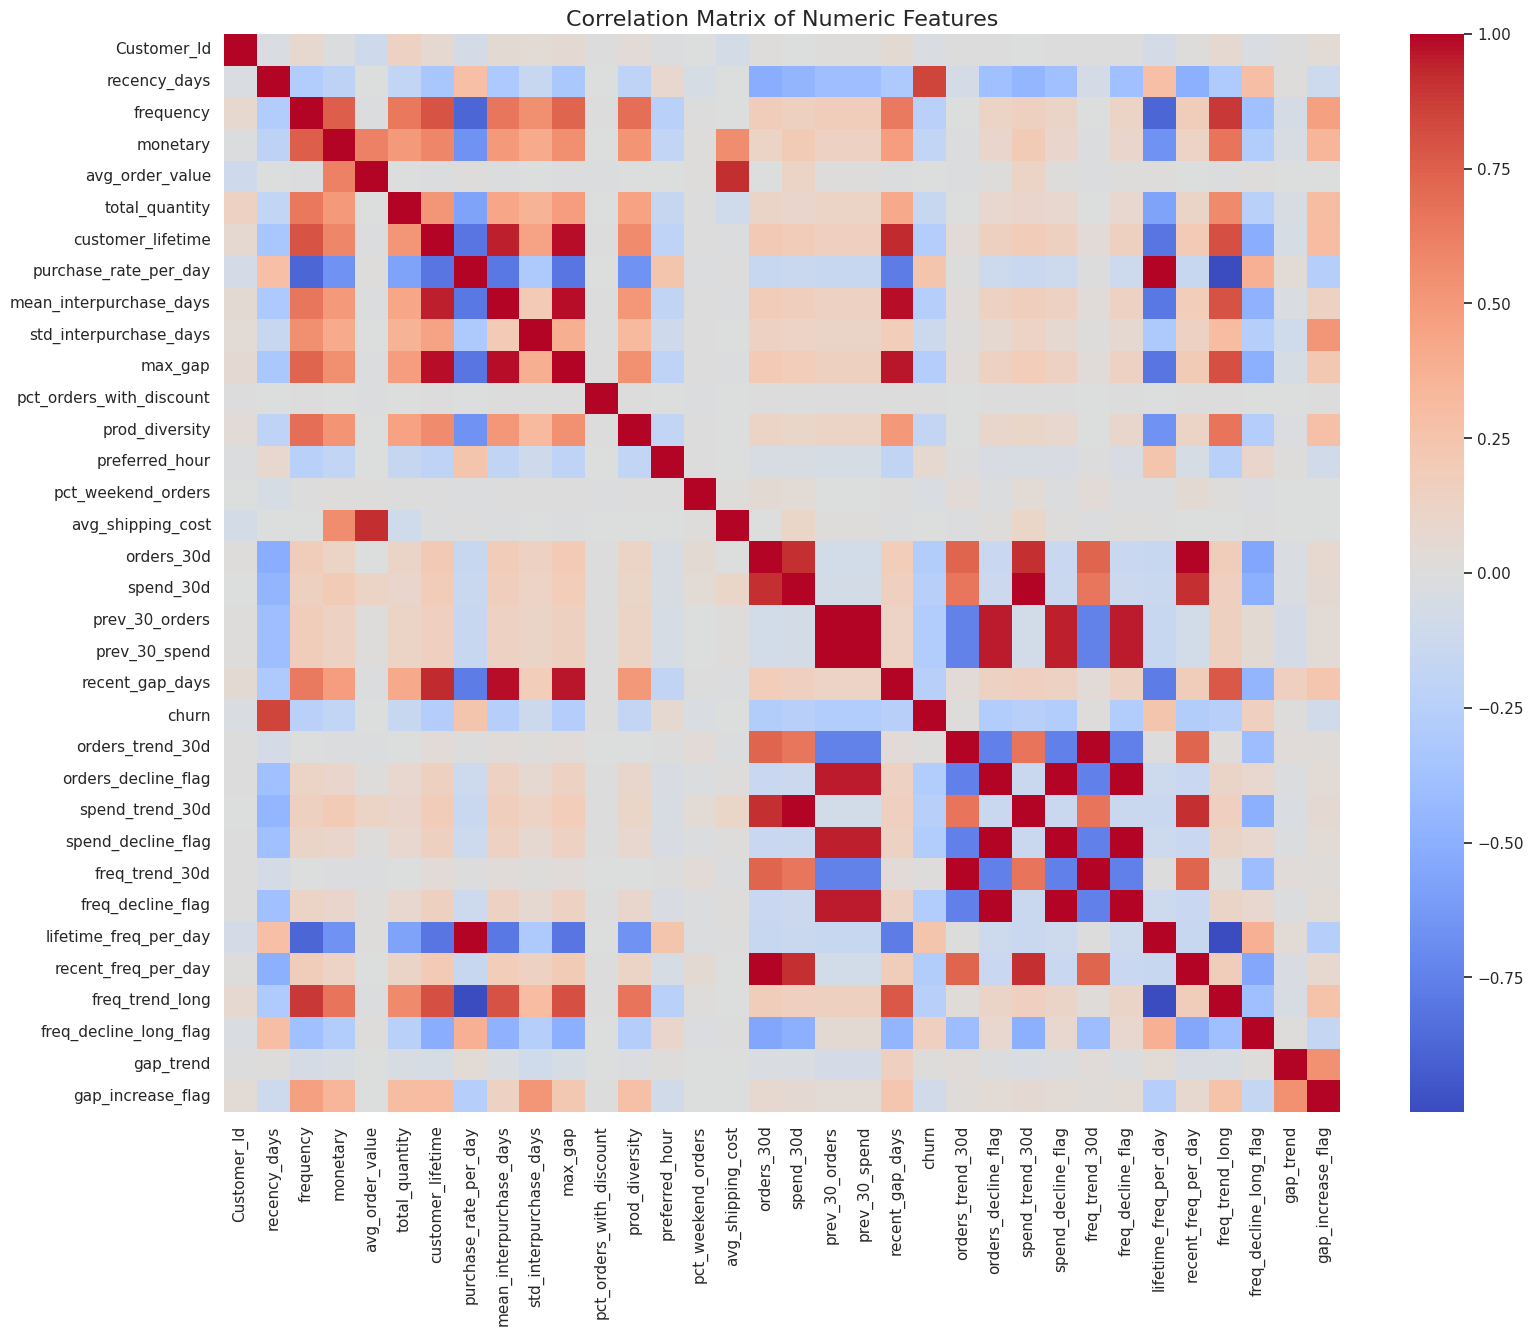

In [ ]:

numeric_cols = df.select_dtypes(include=['int64', 'float64', 'int32']).columns


plt.figure(figsize=(18,14))
sns.heatmap(df[numeric_cols].corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features", fontsize=16)
plt.show()


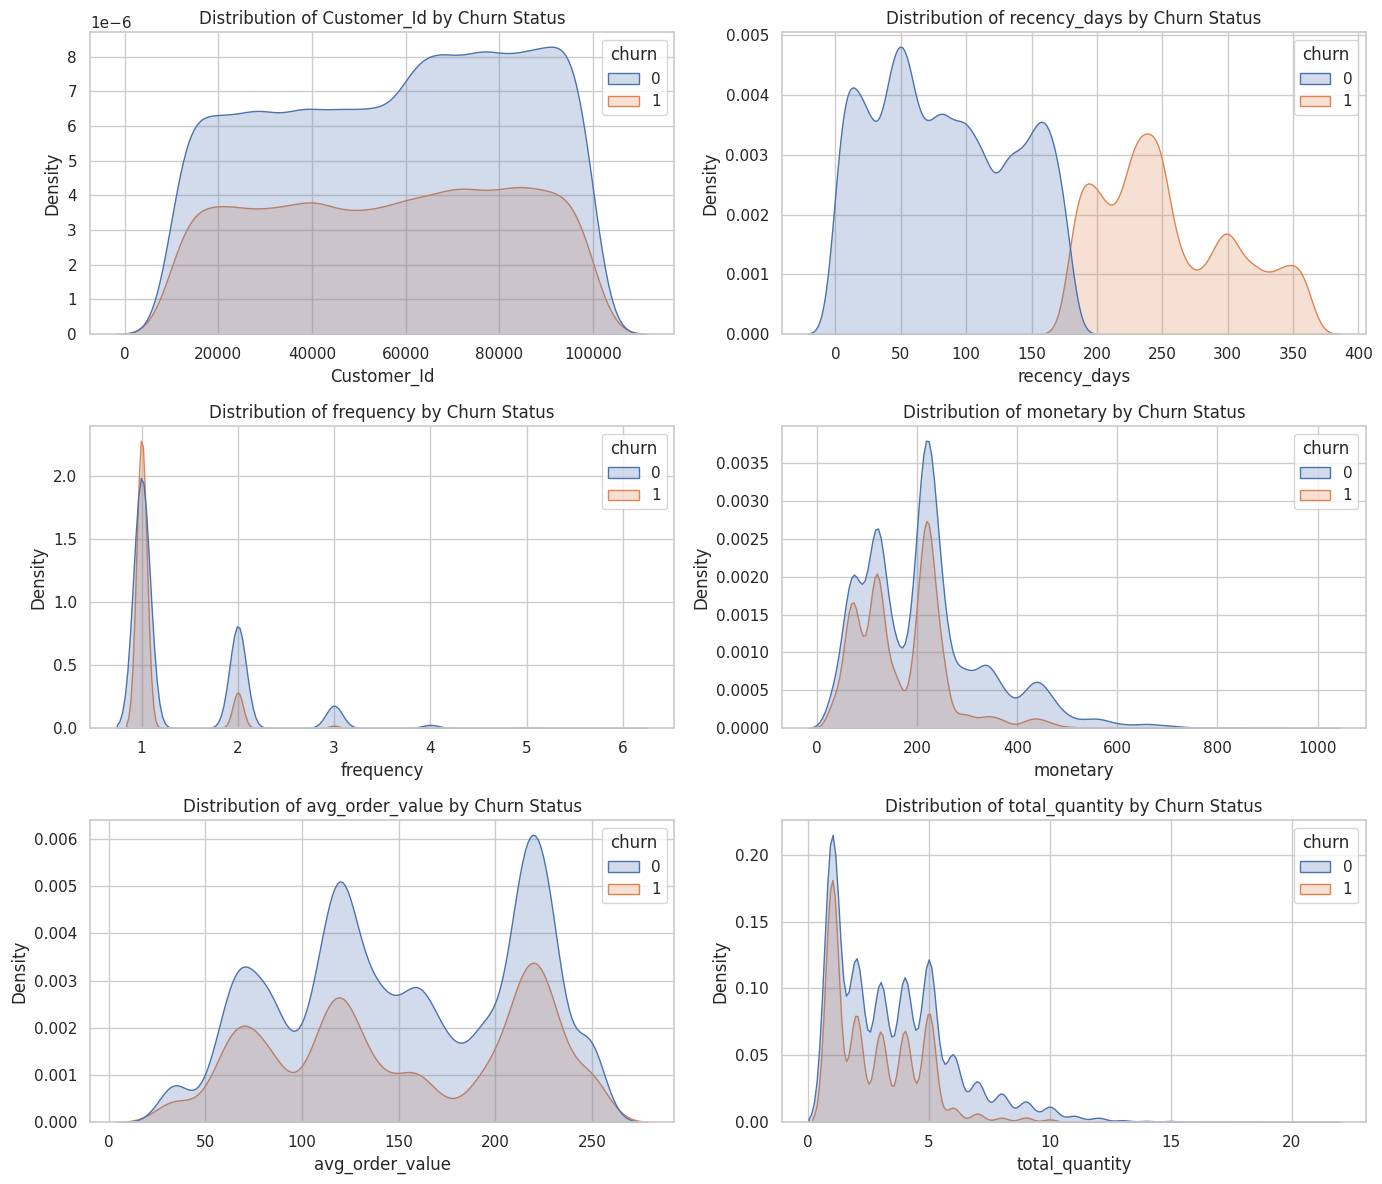

In [5]:
numeric_cols = df.select_dtypes(include=['int64', 'float64', 'int32']).columns
plt.figure(figsize=(14,12))
for i, col in enumerate(numeric_cols[:6], 1):
    plt.subplot(3, 2, i)
    sns.kdeplot(data=df, x=col, hue="churn", fill=True)
    plt.title(f"Distribution of {col} by Churn Status")
plt.tight_layout()
plt.show()


In [6]:

df["std_interpurchase_days"] = df["std_interpurchase_days"].fillna(0)
df["max_gap"] = df["max_gap"].fillna( df['customer_lifetime'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38997 entries, 0 to 38996
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Id               38997 non-null  int64  
 1   recency_days              38997 non-null  int64  
 2   frequency                 38997 non-null  int64  
 3   monetary                  38997 non-null  float64
 4   avg_order_value           38997 non-null  float64
 5   total_quantity            38997 non-null  float64
 6   first_purchase            38997 non-null  object 
 7   last_purchase             38997 non-null  object 
 8   customer_lifetime         38997 non-null  int64  
 9   purchase_rate_per_day     38997 non-null  float64
 10  mean_interpurchase_days   38997 non-null  float64
 11  std_interpurchase_days    38997 non-null  float64
 12  max_gap                   38997 non-null  float64
 13  pct_orders_with_discount  38997 non-null  float64
 14  prod_d

In [7]:
cols_to_drop = [
    'Customer_Id',

    'first_purchase',
    'last_purchase'
]

df.drop(columns=cols_to_drop, errors='ignore', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38997 entries, 0 to 38996
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   recency_days              38997 non-null  int64  
 1   frequency                 38997 non-null  int64  
 2   monetary                  38997 non-null  float64
 3   avg_order_value           38997 non-null  float64
 4   total_quantity            38997 non-null  float64
 5   customer_lifetime         38997 non-null  int64  
 6   purchase_rate_per_day     38997 non-null  float64
 7   mean_interpurchase_days   38997 non-null  float64
 8   std_interpurchase_days    38997 non-null  float64
 9   max_gap                   38997 non-null  float64
 10  pct_orders_with_discount  38997 non-null  float64
 11  prod_diversity            38997 non-null  int64  
 12  fav_category              38997 non-null  object 
 13  preferred_hour            38997 non-null  int64  
 14  pct_we

In [8]:
df.drop(columns=["recency_days"], inplace=True) #because there is information leakage

In [9]:
categorical_cols = [

    "fav_category"
]

df = pd.get_dummies(df, columns=categorical_cols,
                                  drop_first=True)
df.head()

,frequency,monetary,avg_order_value,total_quantity,customer_lifetime,purchase_rate_per_day,mean_interpurchase_days,std_interpurchase_days,max_gap,pct_orders_with_discount,...,freq_decline_flag,lifetime_freq_per_day,recent_freq_per_day,freq_trend_long,freq_decline_long_flag,gap_trend,gap_increase_flag,fav_category_Electronic,fav_category_Fashion,fav_category_Home & Furniture
0,2,293.0,146.5,2.0,22,0.09,22.9,0.0,22.9,1.0,...,0,0.09,0.03,-0.06,1,-0.9,0,False,False,False
1,1,149.0,149.0,2.0,1,1.00,1.0,0.0,1.0,1.0,...,0,1.00,0.00,-1.00,1,0.0,0,True,False,False
2,1,85.0,85.0,4.0,1,1.00,1.0,0.0,1.0,1.0,...,0,1.00,0.00,-1.00,1,0.0,0,False,True,False
3,2,440.0,220.0,3.0,55,0.04,55.3,0.0,55.3,1.0,...,0,0.04,0.00,-0.04,1,-0.3,0,True,False,False
4,1,159.0,159.0,1.0,1,1.00,1.0,0.0,1.0,1.0,...,0,1.00,0.00,-1.00,1,0.0,0,False,True,False


In [10]:

X = df.drop(columns=["churn"])
y = df["churn"]

# Stratified split (important for imbalanced churn)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((31197, 34), (7800, 34))

In [11]:
# donot scale columns as they are already 0 or 1
continuous_cols = [
    "frequency","monetary", "avg_order_value", "total_quantity",
    "customer_lifetime","purchase_rate_per_day","mean_interpurchase_days",
    "std_interpurchase_days","max_gap","pct_orders_with_discount",
    "pct_weekend_orders","avg_shipping_cost","orders_30d","spend_30d",
    "prev_30_orders","prev_30_spend","recent_gap_days",
    "orders_trend_30d","spend_trend_30d","freq_trend_30d",
    "lifetime_freq_per_day","recent_freq_per_day",
    "freq_trend_long","gap_trend"
]

scaler = StandardScaler()


X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols])

In [12]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply only on training set
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: churn
0    20272
1    10925
Name: count, dtype: int64
After SMOTE: churn
0    20272
1    20272
Name: count, dtype: int64


In [ ]:
# Initialize models
models = {
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"--- {name} ---")

    # Train on resampled data
    model.fit(X_train_res, y_train_res)

    # Predict on test set
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]  # for ROC-AUC

    # Metrics
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_proba))
    print(confusion_matrix(y_test, y_pred))
    print("\n")

--- RandomForest ---
              precision    recall  f1-score   support

           0       0.75      0.72      0.73      5068
           1       0.51      0.55      0.53      2732

    accuracy                           0.66      7800
   macro avg       0.63      0.63      0.63      7800
weighted avg       0.67      0.66      0.66      7800

ROC-AUC: 0.7392389924551719
[[3653 1415]
 [1238 1494]]


--- XGBoost ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:47:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.88      0.58      0.70      5068
           1       0.52      0.86      0.65      2732

    accuracy                           0.68      7800
   macro avg       0.70      0.72      0.67      7800
weighted avg       0.76      0.68      0.68      7800

ROC-AUC: 0.7589412467744676
[[2942 2126]
 [ 394 2338]]


--- LogisticRegression ---
              precision    recall  f1-score   support

           0       0.95      0.53      0.68      5068
           1       0.52      0.95      0.67      2732

    accuracy                           0.68      7800
   macro avg       0.73      0.74      0.68      7800
weighted avg       0.80      0.68      0.68      7800

ROC-AUC: 0.7622887659023228
[[2694 2374]
 [ 149 2583]]




Classification Report
              precision    recall  f1-score   support

           0       0.92      0.55      0.69      5068
           1       0.52      0.91      0.67      2732

    accuracy                           0.68      7800
   macro avg       0.72      0.73      0.68      7800
weighted avg       0.78      0.68      0.68      7800

 Confusion Matrix 
[[2808 2260]
 [ 245 2487]]
ROC-AUC: 0.7632


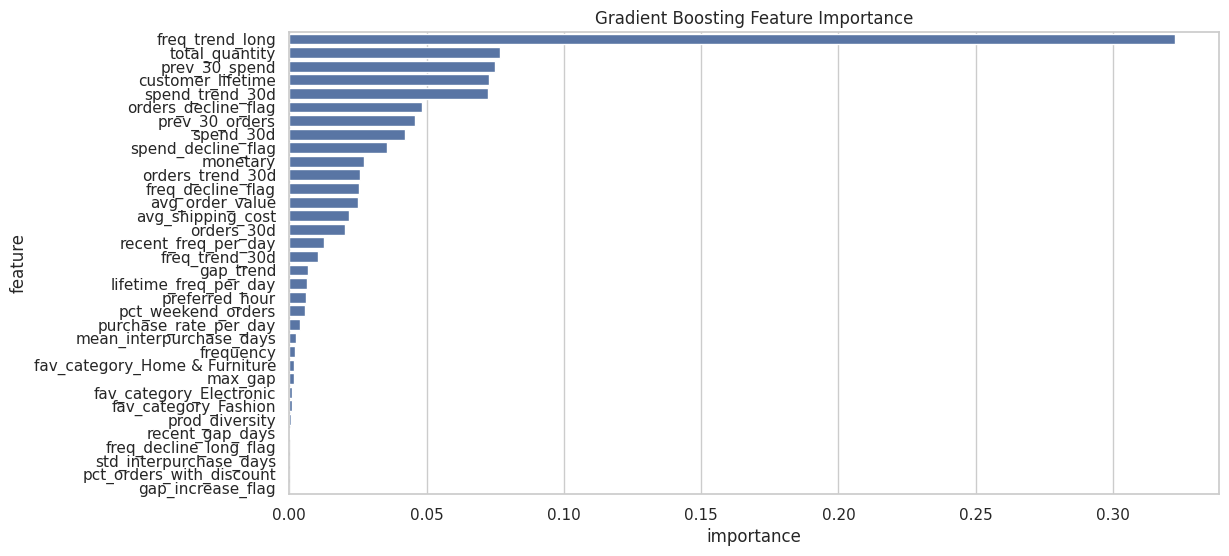

In [ ]:
gbc = GradientBoostingClassifier(
    n_estimators=200,        # Number of trees
    learning_rate=0.1,       # Step size shrinkage
    max_depth=3,             # Depth of each tree
    subsample=0.8,           # For stochastic GB
    random_state=42
)

gbc.fit(X_train_res, y_train_res)
y_pred = gbc.predict(X_test)
y_proba = gbc.predict_proba(X_test)[:,1]

print("Classification Report")
print(classification_report(y_test, y_pred))

print(" Confusion Matrix ")
cm = confusion_matrix(y_test, y_pred)
print(cm)

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC: {roc_auc:.4f}")

# Feature Importance
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': gbc.feature_importances_
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title("Gradient Boosting Feature Importance")
plt.show()

# **Hyperparameter tuning**

In [13]:
rf = RandomForestClassifier()

params = {
    "n_estimators": [200, 300, 500],
    "max_depth": [8, 12, 16, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['sqrt', 'log2']
}

rf_search = RandomizedSearchCV(
    rf, param_distributions=params, n_iter=30,
    scoring='f1', cv=3, n_jobs=-1, verbose=2
)

rf_search.fit(X_train_res, y_train_res)
best_rf = rf_search.best_estimator_
print(best_rf)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
RandomForestClassifier(max_depth=16, min_samples_leaf=2, n_estimators=300)


In [14]:
gb = GradientBoostingClassifier()

gb_params = {
    "n_estimators": [200, 300],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [2, 3, 4],
    "subsample": [0.7, 0.9, 1.0]
}

gb_search = RandomizedSearchCV(
    gb, gb_params, n_iter=20, cv=3,
    scoring='f1', n_jobs=-1, verbose=2
)

gb_search.fit(X_train_res, y_train_res)
best_gb = gb_search.best_estimator_
print(best_gb)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
GradientBoostingClassifier(learning_rate=0.01, n_estimators=300, subsample=0.7)


In [15]:
xgb = XGBClassifier(
    eval_metric='logloss',
    tree_method='hist',
    random_state=42
)

xgb_params = {
    "n_estimators": [200, 300, 500],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 4, 6],
    "subsample": [0.7, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.9, 1.0]
}

xgb_search = RandomizedSearchCV(
    xgb, xgb_params, n_iter=25, cv=3,
    scoring='f1', n_jobs=-1, verbose=2
)

xgb_search.fit(X_train_res, y_train_res)
best_xgb = xgb_search.best_estimator_
print(best_xgb)


Fitting 3 folds for each of 25 candidates, totalling 75 fits
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)


In [16]:
models = {
    "Random Forest": best_rf,
    "Gradient Boosting": best_gb,
    "XGBoost": best_xgb
}

for name, model in models.items():
    preds = model.predict(X_test)
    print("\n", name, "\n")
    print(classification_report(y_test, preds))
    print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))



 Random Forest 

              precision    recall  f1-score   support

           0       0.93      0.54      0.69      5068
           1       0.52      0.93      0.67      2732

    accuracy                           0.68      7800
   macro avg       0.73      0.74      0.68      7800
weighted avg       0.79      0.68      0.68      7800

ROC-AUC: 0.7609493682405377

 Gradient Boosting 

              precision    recall  f1-score   support

           0       0.95      0.53      0.68      5068
           1       0.52      0.94      0.67      2732

    accuracy                           0.68      7800
   macro avg       0.73      0.74      0.68      7800
weighted avg       0.80      0.68      0.68      7800

ROC-AUC: 0.7611302176201609

 XGBoost 

              precision    recall  f1-score   support

           0       0.94      0.54      0.68      5068
           1       0.52      0.94      0.67      2732

    accuracy                           0.68      7800
   macro avg       0

In [17]:
models = ["Random Forest", "Gradient Boosting", "XGBoost"]

accuracy = [0.68, 0.68, 0.68]
f1_score = [0.68, 0.68, 0.67]
roc_auc = [0.7633, 0.7640, 0.7660]

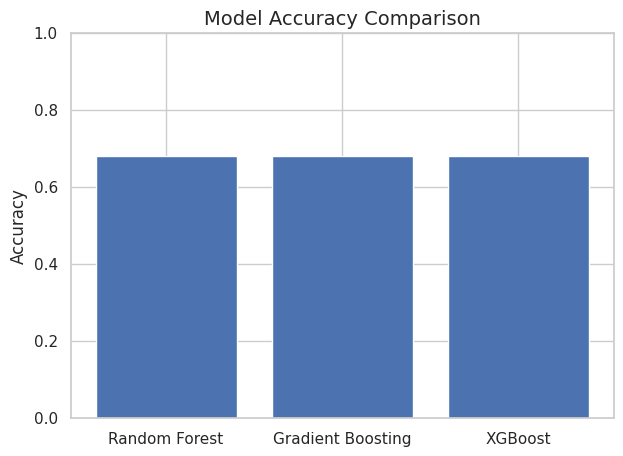

In [18]:
plt.figure(figsize=(7,5))
plt.bar(models, accuracy)
plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


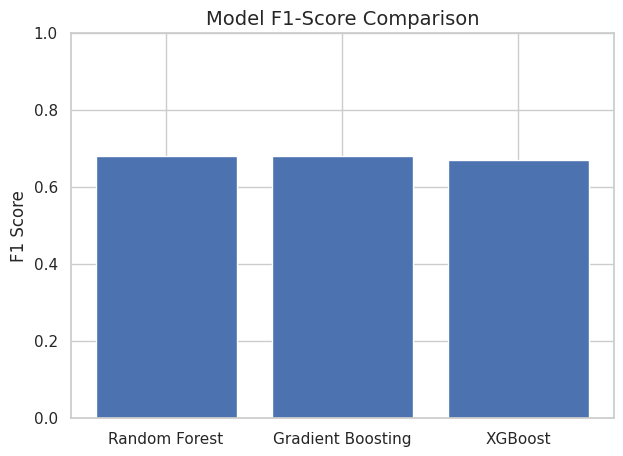

In [19]:
plt.figure(figsize=(7,5))
plt.bar(models, f1_score)
plt.title("Model F1-Score Comparison", fontsize=14)
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.show()


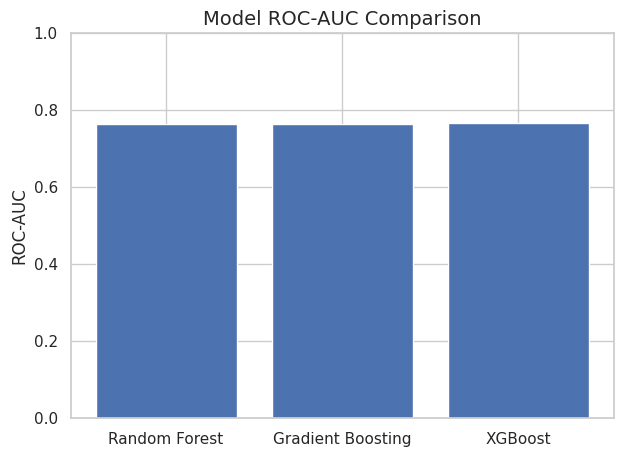

In [20]:
plt.figure(figsize=(7,5))
plt.bar(models, roc_auc)
plt.title("Model ROC-AUC Comparison", fontsize=14)
plt.ylabel("ROC-AUC")
plt.ylim(0, 1)
plt.show()


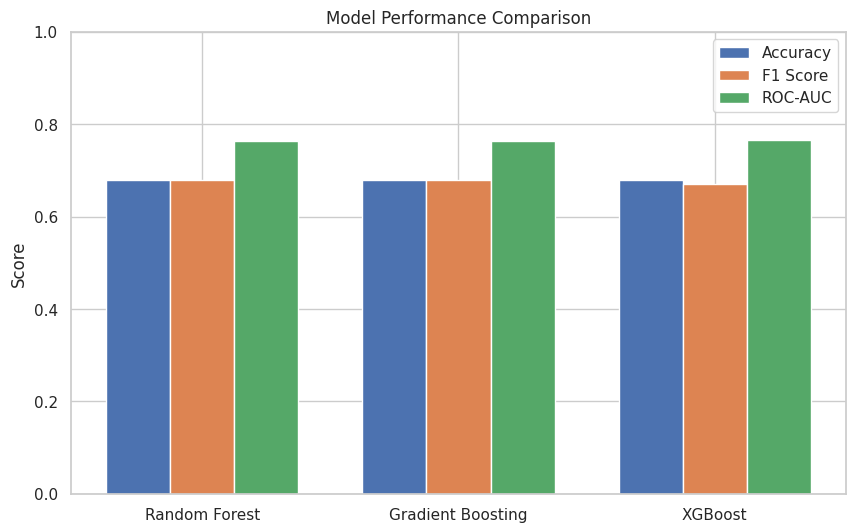

In [21]:
x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10,6))

plt.bar(x - width, accuracy, width, label='Accuracy')
plt.bar(x, f1_score, width, label='F1 Score')
plt.bar(x + width, roc_auc, width, label='ROC-AUC')

plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Model Performance Comparison")

plt.ylim(0, 1)
plt.legend()

plt.show()


**Since the dataset did not contain a churn label, I defined churn using a 180-day inactivity window. This produces a realistic yet complex churn pattern, making accuracy lower than datasets with explicit churn labels. The focus of this project is on feature engineering and customer behavioral analysis.**

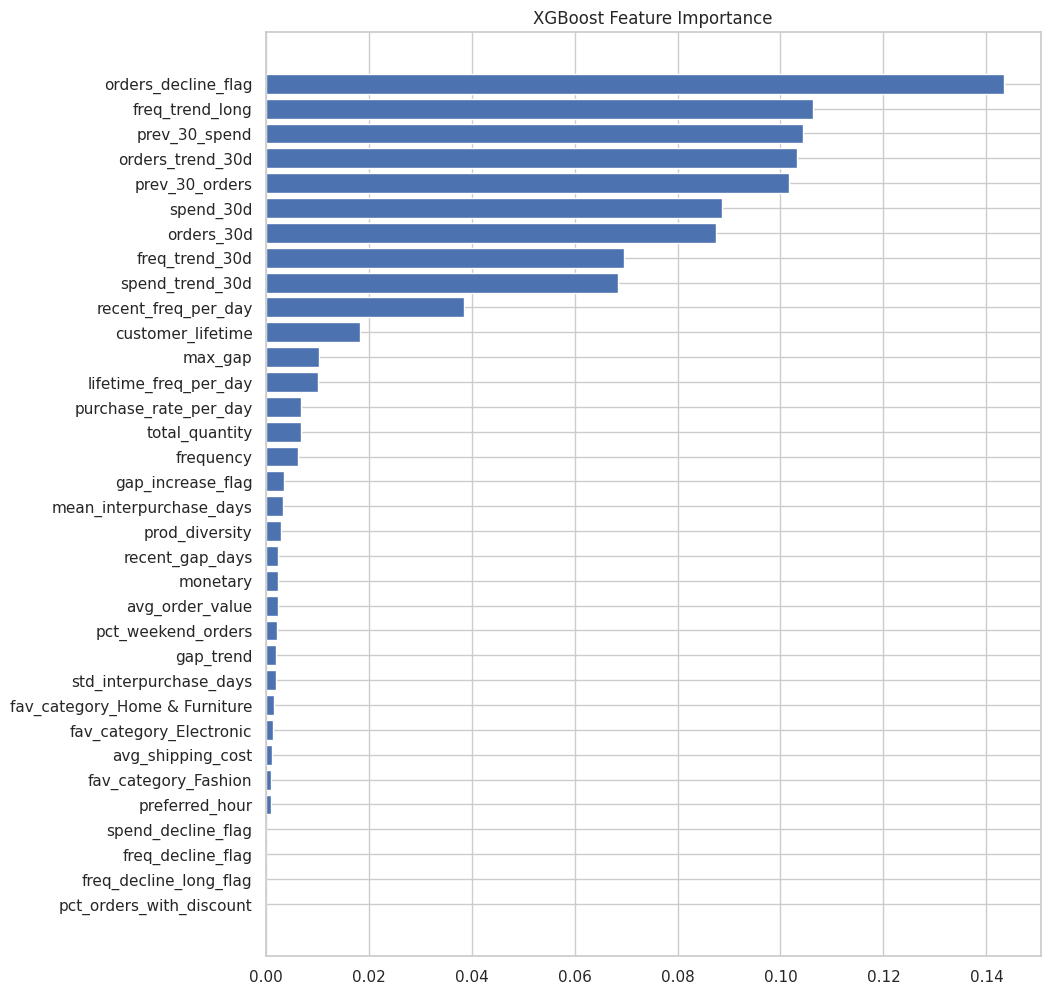

In [22]:
importance = best_xgb.feature_importances_
feat_imp = pd.DataFrame({
    'feature': X.columns,
    'importance': importance
}).sort_values('importance', ascending=True)

plt.figure(figsize=(10, 12))
plt.barh(feat_imp['feature'], feat_imp['importance'])
plt.title("XGBoost Feature Importance")
plt.show()


**All the columns like "pct_order_with_discount", "mean_interpurchase_days"etc that have zero feature importance we can drop them. It may be the info is being repeated in them.**